In [1]:
import pandas as pd

df = pd.read_csv("samples/sample_wind_poitiers.csv", parse_dates=["Timestamp"])
df = df.set_index("Timestamp")
df

,speed,direction
Timestamp,,
2011-03-07 17:30:00,3.6,91.0
2011-03-07 17:40:00,5.6,92.0
2011-03-07 17:50:00,4.9,92.0
2011-03-07 18:00:00,2.3,113.0
2011-03-07 18:10:00,3.2,84.0
...,...,...
2015-06-02 09:20:00,7.7,250.0
2015-06-02 09:30:00,9.7,239.0
2015-06-02 09:40:00,9.3,254.0


In [2]:
import numpy as np

df["speed_x"] = df["speed"] * np.sin(df["direction"] * np.pi / 180.0)
df["speed_y"] = df["speed"] * np.cos(df["direction"] * np.pi / 180.0)

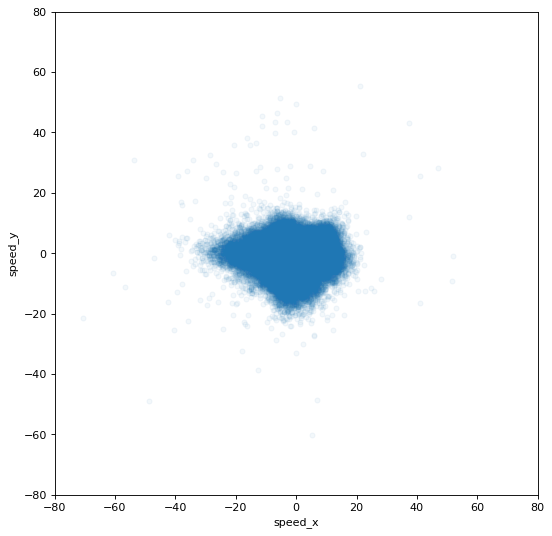

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect("equal")
df.plot(kind="scatter", x="speed_x", y="speed_y", alpha=0.05, ax=ax)
Vw = 80
ax.set_xlim([-Vw, Vw])
ax.set_ylim([-Vw, Vw]);

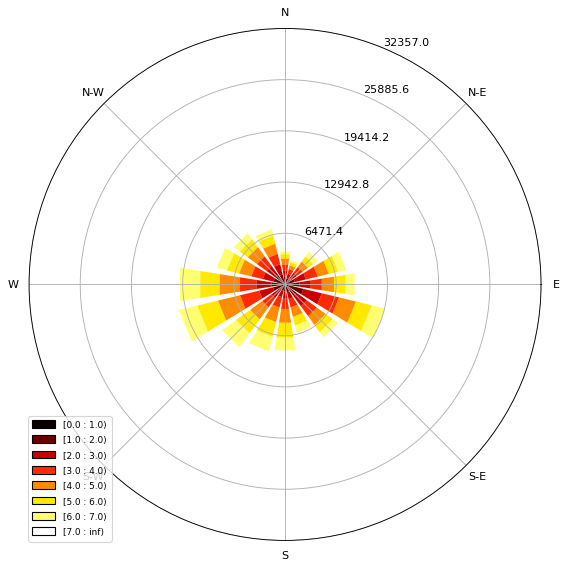

In [4]:
import matplotlib.cm as cm

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(
    df.direction.values, df.speed.values, bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3
)
ax.set_legend();

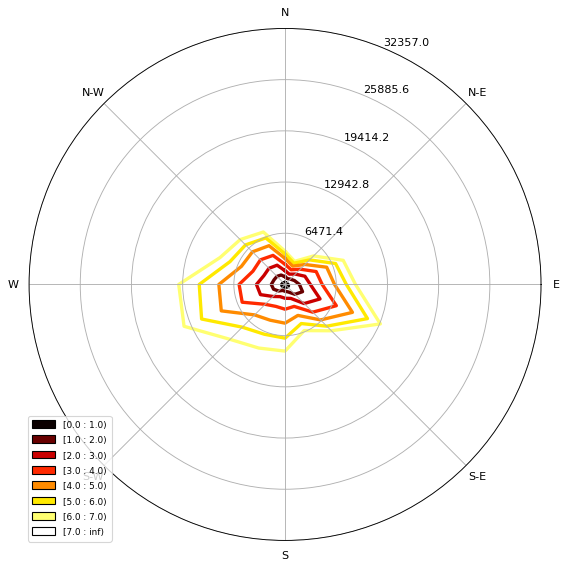

In [5]:
from windrose import plot_windrose

plot_windrose(df, kind="contour", bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3);

In [6]:
bins = np.arange(0, 30 + 1, 1)
bins = bins[1:]
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

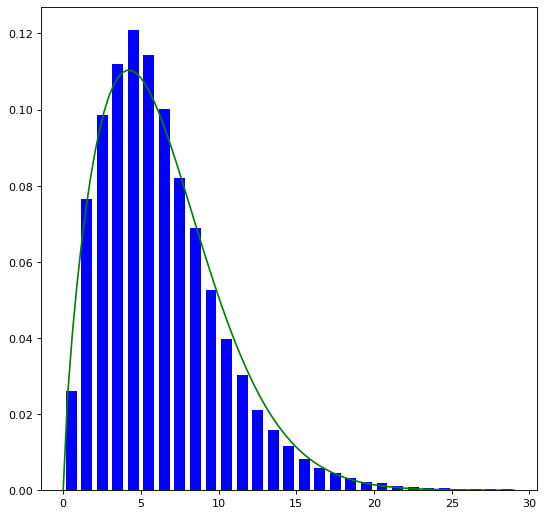

In [7]:
plot_windrose(df, kind="pdf", bins=np.arange(0.01, 30, 1));

In [8]:
data = np.histogram(df["speed"], bins=bins)[0]
data

array([15377, 20041, 23987, 24356, 24041, 21238, 18007, 14144, 11328,
        8461,  6551,  4625,  3265,  2523,  1749,  1294,   922,   686,
         463,   362,   267,   195,   128,   117,    77,    52,    52,
          40,    29])

# Wind rose for a given month

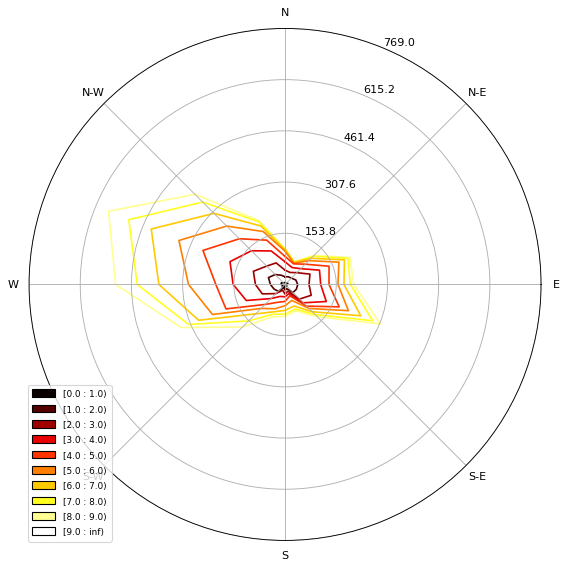

In [9]:
def plot_month(df, t_year_month, *args, **kwargs):
    by = "year_month"
    df[by] = df.index.map(lambda dt: (dt.year, dt.month))
    df_month = df[df[by] == t_year_month]
    ax = plot_windrose(df_month, *args, **kwargs)
    return ax


plot_month(df, (2014, 7), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);

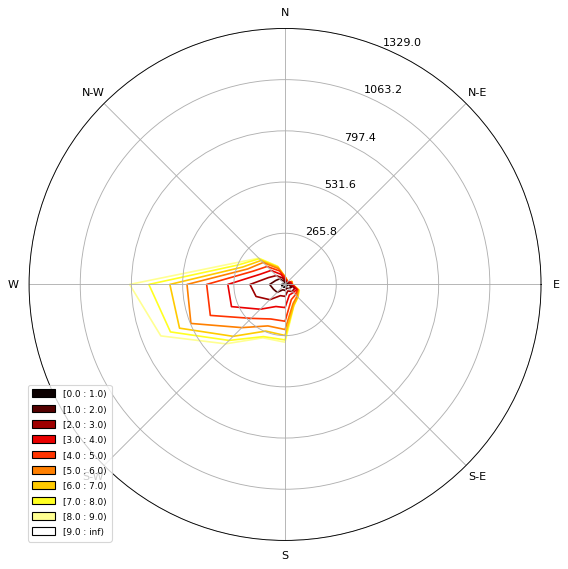

In [10]:
plot_month(df, (2014, 8), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);

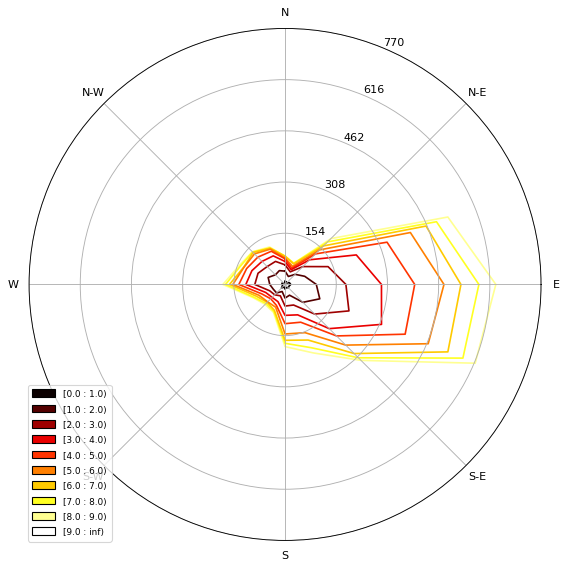

In [11]:
plot_month(df, (2014, 9), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);